# Forcasting

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import prophet
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
print("All libraries imported successfully!") 

C:\Users\Seyar\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


All libraries imported successfully!


### Get Data from EDGAR using edgartool package

In [22]:
ticker = yf.Ticker("AAPL")
print(ticker)
financials = ticker.quarterly_financials.T
print(financials)
financials.to_csv("apple_quarterly_financials.csv")

yfinance.Ticker object <AAPL>
            Tax Effect Of Unusual Items  Tax Rate For Calcs  \
2025-06-30                          0.0            0.163997   
2025-03-31                          0.0            0.155000   
2024-12-31                          0.0            0.147000   
2024-09-30                          0.0            0.210000   
2024-06-30                          0.0            0.159000   

            Normalized EBITDA  \
2025-06-30       3.103200e+10   
2025-03-31       3.225000e+10   
2024-12-31       4.591200e+10   
2024-09-30       3.250200e+10   
2024-06-30       2.820200e+10   

            Net Income From Continuing Operation Net Minority Interest  \
2025-06-30                                       2.343400e+10            
2025-03-31                                       2.478000e+10            
2024-12-31                                       3.633000e+10            
2024-09-30                                       1.473600e+10            
2024-06-30            

### Cleaning & Modeling Dataset 

In [3]:
df = pd.read_csv("apple_quarterly_financials.csv")
df = pd.DataFrame(df)
df = df.rename(columns=({'Unnamed: 0' : 'Date'}))
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date','Total Revenue','Operating Expense']]
df = df.rename(columns=({'Total Revenue':'Revenue' , 'Operating Expense':'Expense' }))
df['Revenue'] = df['Revenue'] / 1000000
df['Expense'] = df['Expense'] / 1000000
# print("Missing Value :\n" ,df.isnull().sum())
df.fillna(method='ffill' , inplace=True)
df = df[df['Revenue'] > 0]
df = df[df['Expense'] > 0]
df = df.sort_values('Date')
df.to_csv("cleaned_financials.csv", index=False)
print("Cleaned data:\n", df.head())

Cleaned data:
         Date   Revenue  Expense
4 2024-06-30   85777.0  14326.0
3 2024-09-30   94930.0  14288.0
2 2024-12-31  124300.0  15443.0
1 2025-03-31   95359.0  15278.0
0 2025-06-30   94036.0  15516.0


C:\Users\Seyar\AppData\Local\Temp\ipykernel_9864\420046967.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill' , inplace=True)


### Plotting Revenue and Expenses

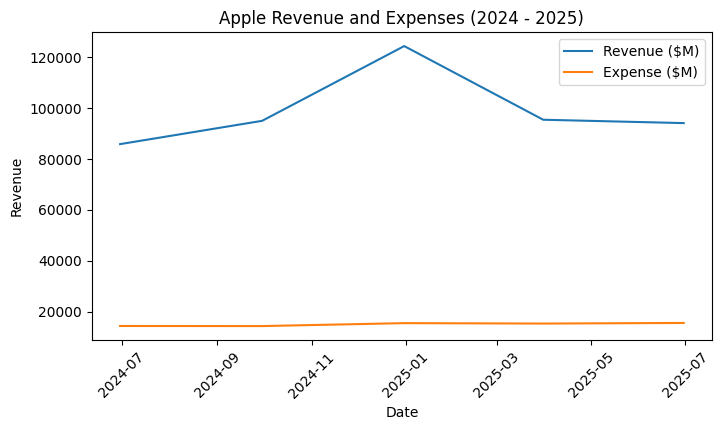

In [13]:
df = pd.read_csv("cleaned_financials.csv")
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(8, 4))
sns.lineplot(data = df , x ='Date' , y='Revenue' , label = 'Revenue ($M)')
sns.lineplot(data = df , x='Date'  , y='Expense' , label='Expense ($M)')
plt.title("Apple Revenue and Expenses (2024 - 2025)")
plt.xticks(rotation=45)
plt.savefig("Visuals/apple_revenue_expenses.png")
plt.show()